[(xa0, xa1, ya0), (xa1, ya0, ya1), (xa1, xa2, ya1), (xa2, ya1, ya2), (xa2, xa3, ya2), (xa3, ya2, ya3)]
[(xb0, xb1, yb0), (xb1, yb0, yb1), (xb1, xb2, yb1), (xb2, yb1, yb2), (xb2, xb3, yb2), (xb3, yb2, yb3)]
[xa0, xa1, ya0, xb1, yb0, yb1]
[xa0, xa1, ya0, xb2, yb1, yb2]
[xa0, xa1, ya0, xb3, yb2, yb3]
[xb0, xb1, yb0, xa1, ya0, ya1]
[xb1, xb2, yb1, xa1, ya0, ya1]
[xb2, xb3, yb2, xa1, ya0, ya1]
[xa1, xa2, ya1, xb1, yb0, yb1]
[xa1, xa2, ya1, xb2, yb1, yb2]
[xa1, xa2, ya1, xb3, yb2, yb3]
[xb0, xb1, yb0, xa2, ya1, ya2]
[xb1, xb2, yb1, xa2, ya1, ya2]
[xb2, xb3, yb2, xa2, ya1, ya2]
[xa2, xa3, ya2, xb1, yb0, yb1]
[xa2, xa3, ya2, xb2, yb1, yb2]
[xa2, xa3, ya2, xb3, yb2, yb3]
[xb0, xb1, yb0, xa3, ya2, ya3]
[xb1, xb2, yb1, xa3, ya2, ya3]
[xb2, xb3, yb2, xa3, ya2, ya3]
sat
[ya1 = 0,
 xb2 = 9,
 yb1 = 25,
 xa2 = 18,
 ya2 = 24,
 xb1 = 10,
 xa1 = 2,
 yb2 = 6,
 yb0 = 1,
 ya0 = 5,
 xb0 = 9,
 xb3 = 17,
 xa3 = 15,
 xa0 = 3,
 yb3 = 13,
 ya3 = 23]
[[3, 2, 18, 15], [5, 0, 24, 23]]
[[9, 10, 9, 17], [1, 25, 6, 13]

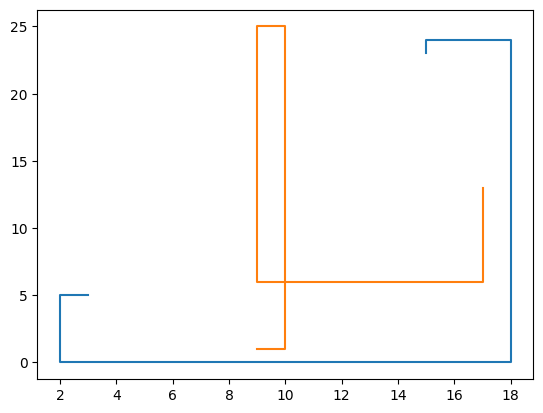

In [247]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))

def make_sig(x, y, n=4):
    return [(x[int(i/2)],x[int(i/2+1)],y[int(i/2)]) if i%2==0 else (x[int(i/2+0.5)],y[int(i/2)],y[int(i/2+0.5)]) for i in range(n)]

s = z3.Solver()

xa = [z3.Int(f"xa{i}") for i in range(8)]
ya = [z3.Int(f"ya{i}") for i in range(8)]
xb = [z3.Int(f"xb{i}") for i in range(8)]
yb = [z3.Int(f"yb{i}") for i in range(8)]




#s.add(collision(3,10,5,8,yb1,yb2))
#sig1 = [collision(xa1,xa2,ya1,xb1,yb1,yb2), collision(xb1,xb2,yb2,xa2,ya1,ya2), collision(xa3,xa2,ya2,xb2,yb2,yb3), collision(xb3,xb2,yb3,xa3,ya2,ya3), collision(xa3,xa4,ya4,xb3,yb4,yb3),]
#sig1 = [(xa[1],xa[2],ya[1]), (xa[2],ya[1],ya[2]), (xa[3],xa[2],ya[2]), (xa[3],ya[2],ya[3]), (xa[4],xa[3],ya[3])]
#sig2 = [(xb[1],yb[1],yb[2]), (xb[1],xb[2],yb[2]), (xb[2],yb[2],yb[3]), (xb[3],xb[2],yb[3]), (xb[3],yb[4],yb[3])]


#sig = [(xa[int(i/2)],xa[int(i/2+1)],ya[int(i/2)]) if i%2==0 else (xa[int(i/2+0.5)],ya[int(i/2)],ya[int(i/2+0.5)]) for i in range(4)]

sig1 = make_sig(xa, ya, 6)
sig2 = make_sig(xb, yb, 6)

print(sig1)
print(sig2)

for i1, s1 in enumerate(sig1):
    for i2, s2 in enumerate(sig2):
        if i1 % 2 == 0:
            if i2 % 2 == 1:
                print([s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]])
                s.add(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))

        if i1 % 2 == 1:
            if i2 % 2 == 0:
                print([s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]])
                s.add(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
        

s.add(xa[0] == 3)
s.add(ya[0] == 5)
s.add(xa[3] == 15)
s.add(ya[3] == 23)

s.add(xb[0] == 9)
s.add(yb[0] == 1)
s.add(xb[3] == 17)
s.add(yb[3] == 13)

print(s.check())
m = s.model()
print(m)



xav = [m[e].as_long() for e in xa if m[e] is not None]
yav = [m[e].as_long() for e in ya if m[e] is not None]
xbv = [m[e].as_long() for e in xb if m[e] is not None]
ybv = [m[e].as_long() for e in yb if m[e] is not None]

print([xav,yav])
print([xbv,ybv])

print(len(xav))
print(len(xbv))

ptsa = [(xav[int(i/2+0.5)], yav[int(i/2)]) for i in range(len(xav)+len(yav)-1)]
print(ptsa)
ptsb = [(xbv[int(i/2+0.5)], ybv[int(i/2)]) for i in range(len(xbv)+len(ybv)-1)]
print(ptsb)
plt.plot(*zip(*ptsa))
plt.plot(*zip(*ptsb))
plt.show()

#ptsa = [(xav[int(i/2)], yav[int(i/2+0.5)]) for i in range(len(xav)+len(yav)-1)]
#print(ptsa)
#ptsb = [(xbv[int(i/2+0.5)], ybv[int(i/2)]) for i in range(len(xbv)+len(ybv)-1)]
#print(ptsb)
#plt.plot(*zip(*ptsa))
#plt.plot(*zip(*ptsb))
#plt.show()

#ptsa = [(xav[int(i/2+0.5)], yav[int(i/2)]) for i in range(len(xav)+len(yav)-1)]
#print(ptsa)
#ptsb = [(xbv[int(i/2)], ybv[int(i/2+0.5)]) for i in range(len(xbv)+len(ybv)-1)]
#print(ptsb)
#plt.plot(*zip(*ptsa))
#plt.plot(*zip(*ptsb))
#plt.show()

#ptsa = [(xav[int(i/2)], yav[int(i/2+0.5)]) for i in range(len(xav)+len(yav)-1)]
#print(ptsa)
#ptsb = [(xbv[int(i/2)], ybv[int(i/2+0.5)]) for i in range(len(xbv)+len(ybv)-1)]
#print(ptsb)
#plt.plot(*zip(*ptsa))
#plt.plot(*zip(*ptsb))
#plt.show()
#plt.plot(xav[1:],yav)

In [243]:
m[m[0]].as_long()

24

In [12]:
def colision(xa1, xa2, ya, xb, yb1, yb2):
    return xb < min(xa1,xa2) or xb > max(xa1,xa2) or ya < min(yb1,yb2) or ya > max(yb1,yb2)

In [14]:
colision(3, 8, 5, 3, 1, 9)

False

In [9]:
l1 = [5, 4, 2, -3,1]
x = 0
y = 0
pts = []
for i, e in enumerate(l1):
    print(f"{i}:{e}")
    if i % 2 == 0:
        x += e
    else:
        y += e
    pts.append((x,y))
print(pts)

0:5
1:4
2:2
3:-3
4:1
[(5, 0), (5, 4), (7, 4), (7, 1), (8, 1)]


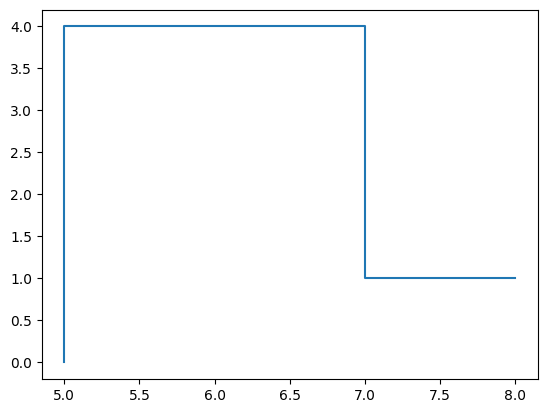

In [10]:
from matplotlib import pyplot as plt
plt.plot(*zip(*pts))

In [116]:
[3,i for i in range(7)]

SyntaxError: did you forget parentheses around the comprehension target? (3726534326.py, line 1)